<a href="https://colab.research.google.com/github/PrernaMakwana/Employee_data/blob/main/ML_eda_on_Automobile_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# **IMPORTING DATASET **

In [ ]:
df=pd.read_csv("Automobile_data.csv")

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [ ]:
df.shape

(205, 15)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


# **CHECK NULL VALUES**

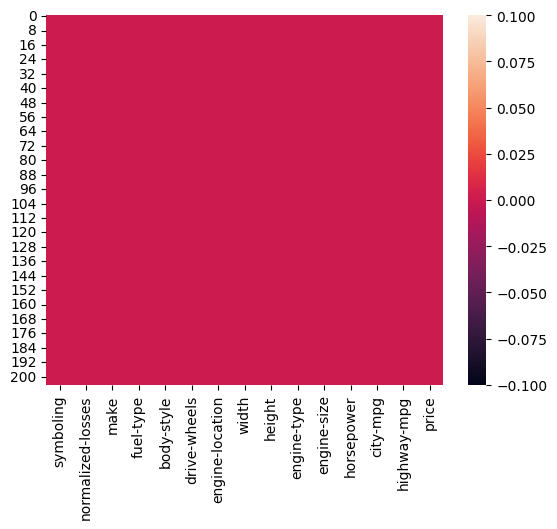

In [ ]:
df.isnull().sum()
#check null values in visualisation form
sb.heatmap(df.isnull())
plt.show()

STEP 1: HANDALING NULL VALUES/ MISSING VALUES (for normalized-losses col and horsepower col)


In [ ]:
df['normalized-losses'].replace('?',np.nan,inplace=True)
df['normalized-losses']

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

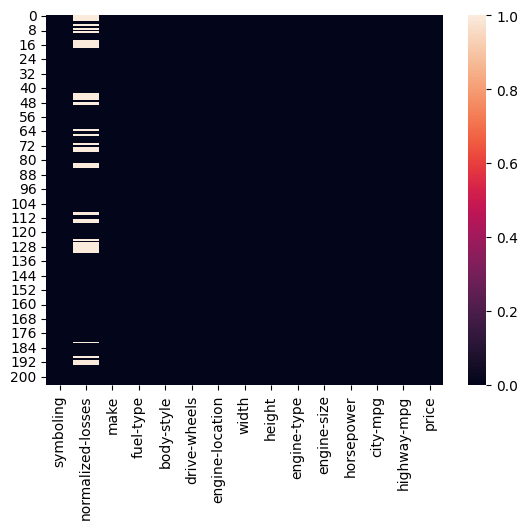

In [ ]:
#check null values in normalized-losses col using visualisation
sb.heatmap(df.isnull())
plt.show()

# **STEP 2: LABEL ENCODING (TO CONVERT OBJECT TYPE DATA INTO NUMERIC)**


In [ ]:
df['normalized-losses']=df['normalized-losses'].astype("float")
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
#SAME FOR HORSEPOWER COL
df['horsepower'].replace('?',np.nan,inplace=True)
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

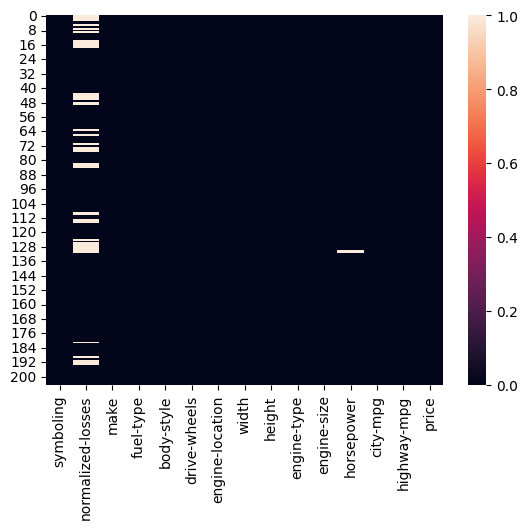

In [ ]:
#check null values in horse power col in visualisation form
sb.heatmap(df.isnull())
plt.show()


In [ ]:
#convert object type data into floattype i.e label encoding
df['horsepower']=df['horsepower'].astype("float")
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

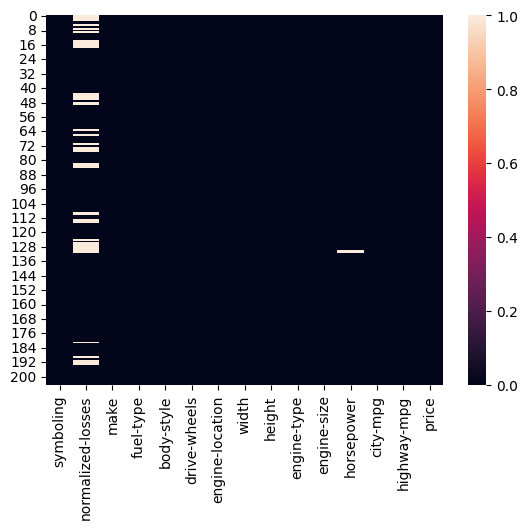

In [ ]:
#to check null values
df.isnull().sum()
#to check null values in visualisation form
sb.heatmap(df.isnull())
plt.show()


In [ ]:
# find the % of null values in each col
df.isnull().sum()/df.shape[0]*100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
width                 0.00000
height                0.00000
engine-type           0.00000
engine-size           0.00000
horsepower            0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 0.00000
dtype: float64

In [ ]:
#fill the normalized-losses col and horsepower col with its mean permanently using fillna()
m=df['normalized-losses'].mean()
df['normalized-losses'].fillna(m,inplace=True)


m=df['horsepower'].mean()
df['horsepower'].fillna(m,inplace=True)


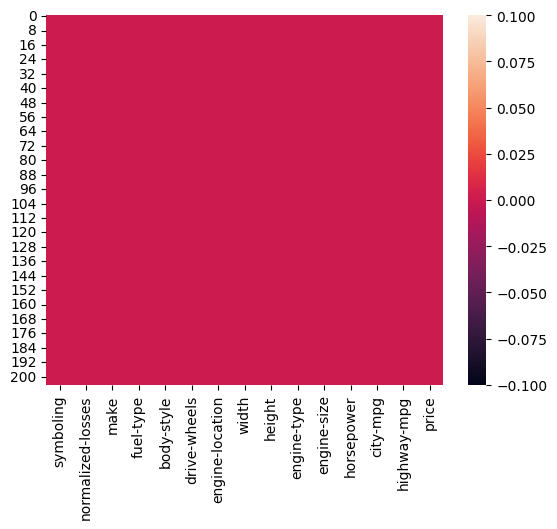

In [ ]:
#check the null values in visualisation form
sb.heatmap(df.isnull())
plt.show()

In [ ]:
#to check the duplicate rows
df.duplicated().sum()

0

# **STEP 3: HANDLE OUTLIERS **



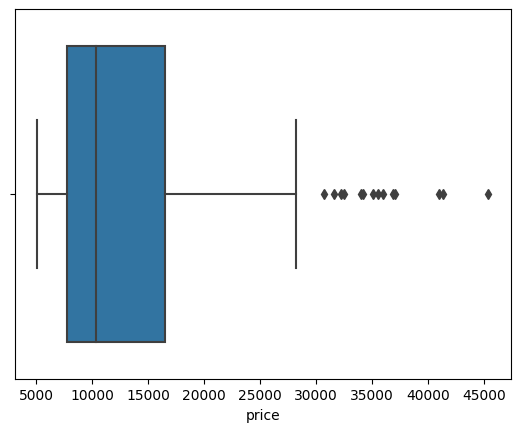

In [ ]:
#LOWER WHISKER<=VALUES<=UPPER WHISKER WHICH MEANS NO OUTLIERS
#USE BOXPLOT FOR OUTLIERS
#IT HAS MIN , MAX , FIRST QUANTILE,MEDIAN,THIRD QUANTILE
sb.boxplot(data=df,x='price')
plt.show()

In [ ]:
#OUTLIER IS PRESENT BUT WE CANNOT DELETE THE WHOLE COL FROM THE DATASET
#SO WE WILL CONSIDER I/P WITH O/P
df[df['price']>30000]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
15,0,122.0,bmw,gas,sedan,rwd,front,66.9,55.7,ohc,209,182.0,16,22,30760
16,0,122.0,bmw,gas,sedan,rwd,front,67.9,53.7,ohc,209,182.0,16,22,41315
17,0,122.0,bmw,gas,sedan,rwd,front,70.9,56.3,ohc,209,182.0,15,20,36880
47,0,145.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,32250
48,0,122.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,35550
49,0,122.0,jaguar,gas,sedan,rwd,front,70.6,47.8,ohcv,326,262.0,13,17,36000
70,-1,93.0,mercedes-benz,diesel,sedan,rwd,front,71.7,56.3,ohc,183,123.0,22,25,31600
71,-1,122.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.5,ohcv,234,155.0,16,18,34184
72,3,142.0,mercedes-benz,gas,convertible,rwd,front,70.5,50.8,ohcv,234,155.0,16,18,35056
73,0,122.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.7,ohcv,308,184.0,14,16,40960


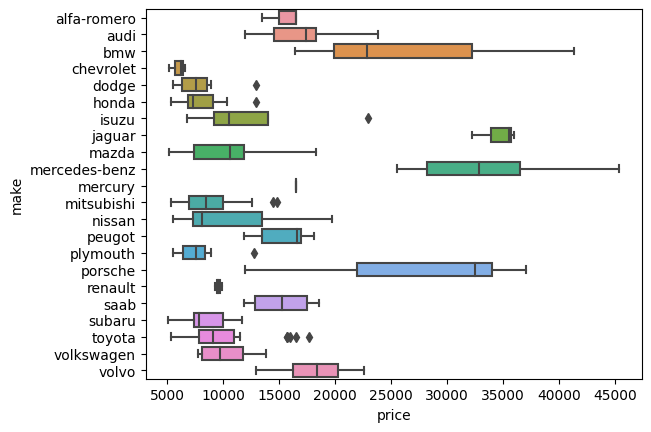

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#CREATE A BOXPLOT FOR TARGET VARIABLE: PRICE AND I/P VARIABLE: MAKE
sb.boxplot(data=df,x="price",y="make")
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
#TO SHOW THOSE RECORD WHOSE MAKE = 'isuzu' , and price>=20000
df[(df['make']=='isuzu')&(df['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [ ]:
#REMOVING THE OUTLIER I.E RECORD NO. 45 PERMANENTLY FROM THE RECORD
df.drop(45,inplace=True)

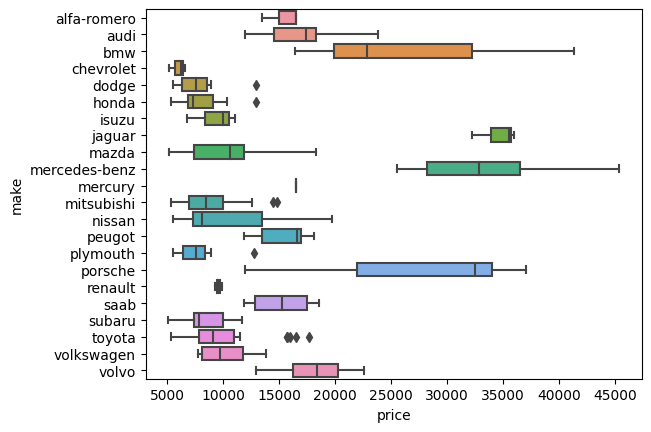

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#AGAIN WE CHECK FOR OUTLIERS IN THE DATASET USING BOXPLOT
sb.boxplot(data=df,x="price",y="make")
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
#to show those records whose make=toyota and price>=15000
L=df[(df['make']=='toyota')&(df['price']>15000)].index
L

Int64Index([172, 178, 179, 180, 181], dtype='int64')

In [ ]:
#to delete record no. 172, 178, 179, 180, 181 permanently
df.drop(L,inplace=True)

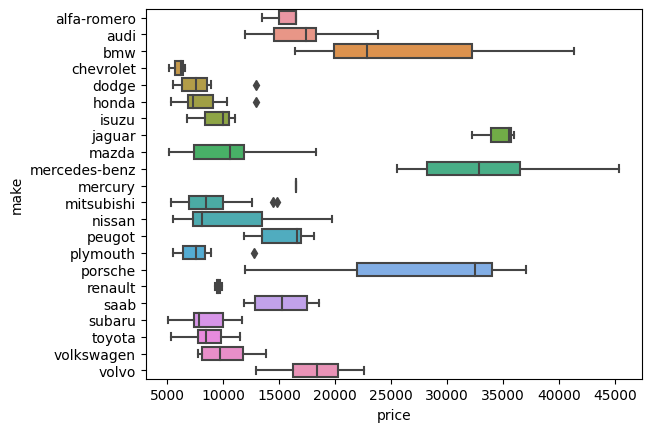

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#TO CHECK THE OUTLIERS IN VISUALISATION FORM USING BOXPLOT
sb.boxplot(data=df,x="price",y="make")
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
#to shoe those records whose make= plymouth and price>10000
df[(df['make']=='plymouth')&(df['price']>10000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [ ]:
#TO DELETE THOSE RECORDS WHOSE MAKE=Plymouth AND PRICE>10000
df.drop(124,inplace=True)

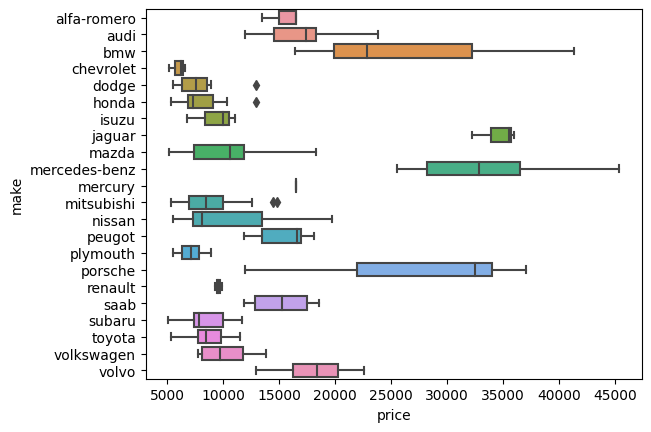

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#TO CHECK THE OUTLIERS USING VISUALIZATION FORM
sb.boxplot(data=df,x="price",y="make")
plt.figure(figsize=(10,10))
plt.show()

# **STEP 4: LABEL ENCODING (CONVERT OBJECT/CATEGORICAL TYPE DATA INTO NUMERIC TYPE DATA)**

In [ ]:
#THERE ARE 2 WAYS TO CONVERT CATEGORICAL TYPE DATA INTO NUMERIC TYPE
#1. ONE HOT ENCODING :Is a powerful technique to treat categorical data, but it can lead to increased dimensionality, sparsity, and overfitting.
#It is important to use it cautiously and consider other methods such as ordinal encoding or binary encoding.
#2. LABEL ENCODING : Label encoding is simpler and more space-efficient, but it may introduce an arbitrary order to categorical values.
# One-hot encoding avoids this issue by creating binary columns for each category, but it can lead to high-dimensional data.


In [ ]:
#WE SPLIT THE DATAFRAME DF INTO 2 DATAFRAMES I.E 1ST WHICH HOLDS ALL THE OBJECT TYPE DATA AND 2.WHICH HOLDS NUMERIC TYPE DATA
#BUT 1ST WE CREATE A NEW DATAFRAME DF_CAT WHICH HOLDS OBJ TYPE
df_cat=df.select_dtypes(object)
df_cat.dtypes

make               object
fuel-type          object
body-style         object
drive-wheels       object
engine-location    object
engine-type        object
dtype: object

In [ ]:
#2ND WE CREATE  A DATAFRAME WHOCH HOLDS ALL THE NUMERIC TYPE DATA
df_num=df.select_dtypes(["int","float"])
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [ ]:
#2 : label encoding
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
  #create obj of label encoder class
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])

df_cat.head()
df_cat.dtypes

make               int64
fuel-type          int64
body-style         int64
drive-wheels       int64
engine-location    int64
engine-type        int64
dtype: object

# **STEP 5: HANDLING SKEWNESS **


In [ ]:
df_num.dtypes

symboling              int64
normalized-losses    float64
width                float64
height               float64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')
column name: symboling and skewness: 0.2179035491926849


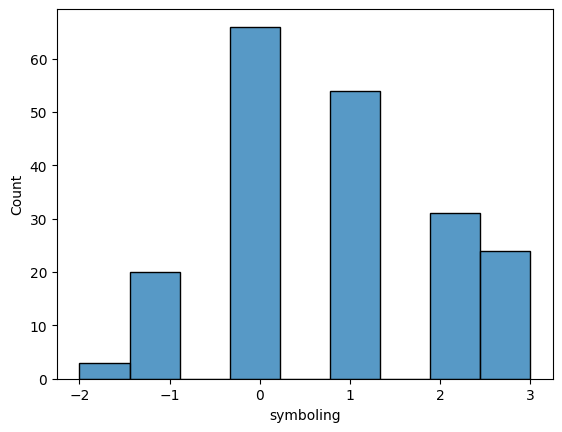

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


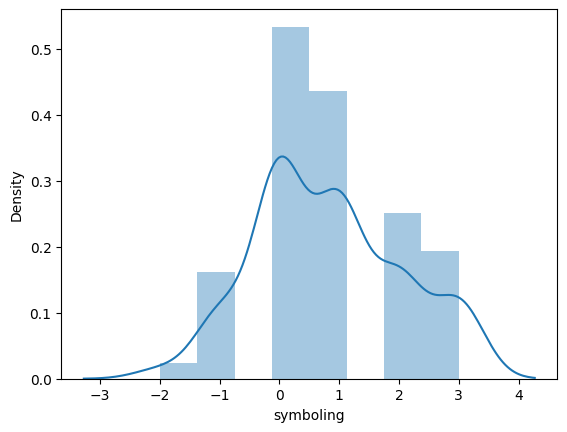

column name: normalized-losses and skewness: 0.8505971024988705


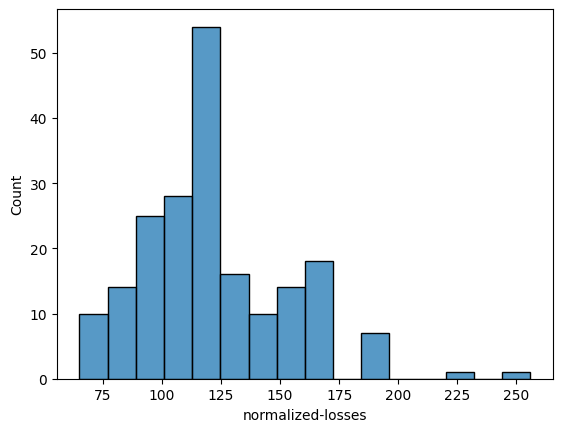

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


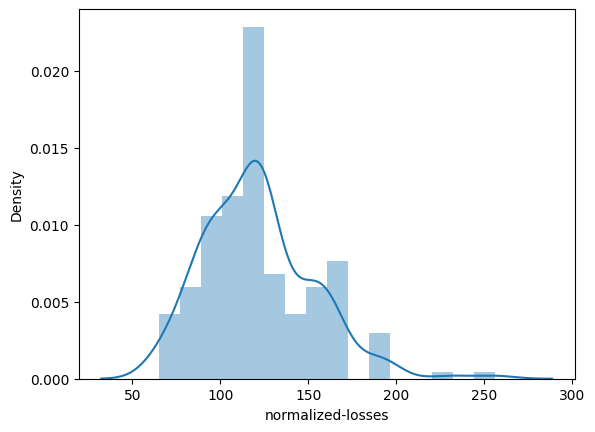

column name: width and skewness: 0.9251948402404122


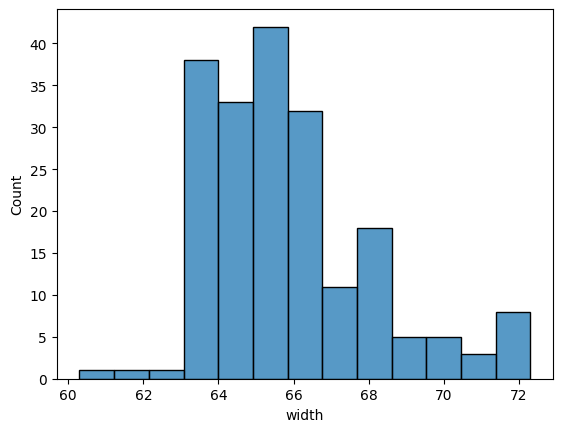

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


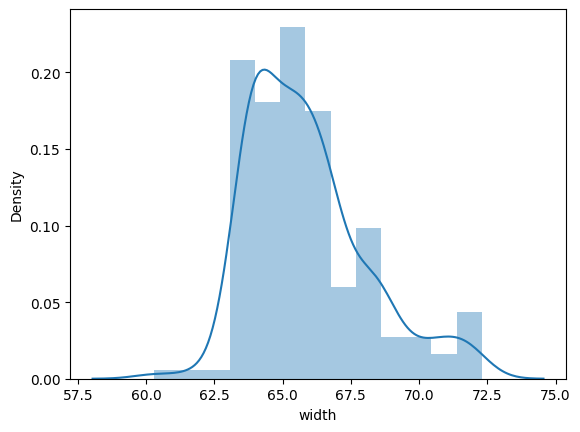

column name: height and skewness: 0.030312061215396396


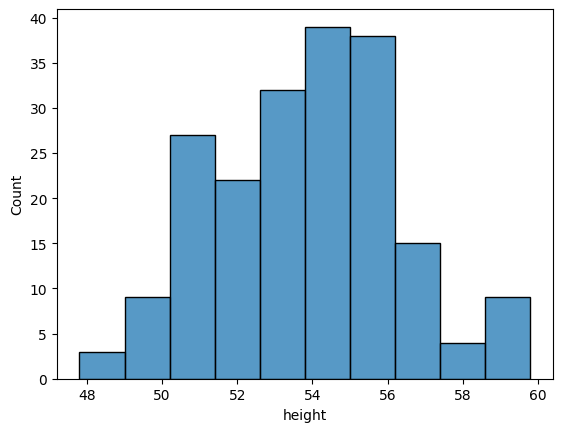

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


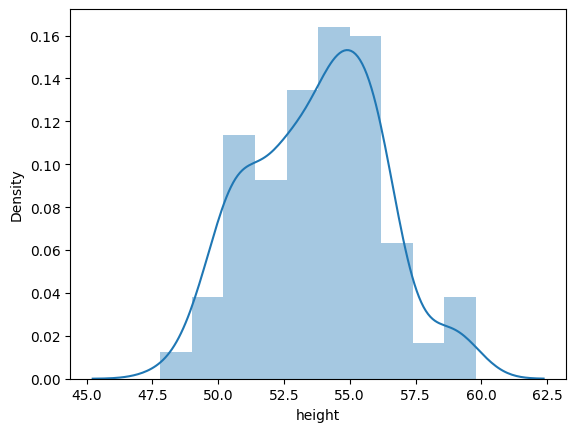

column name: engine-size and skewness: 2.0419231485148552


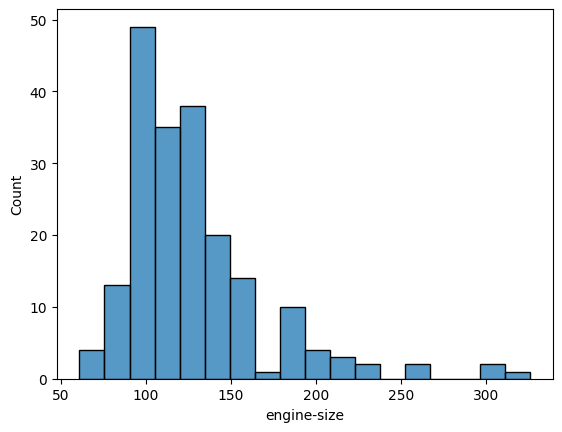

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


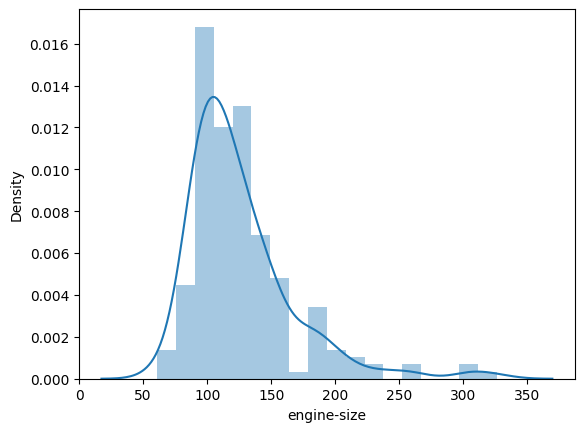

column name: horsepower and skewness: 1.5122697241319696


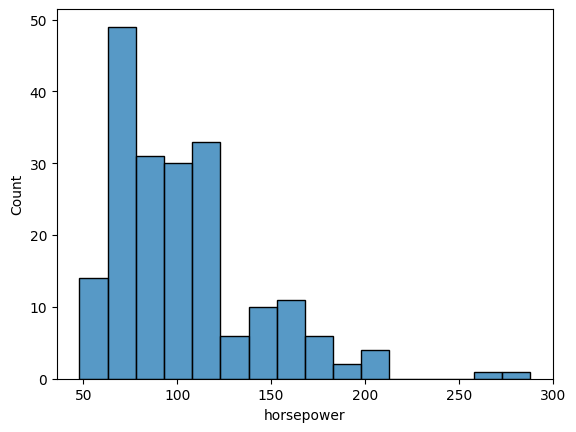

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


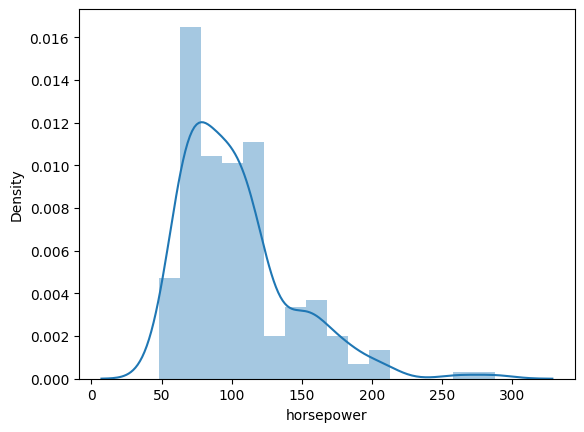

column name: city-mpg and skewness: 0.6310901286626849


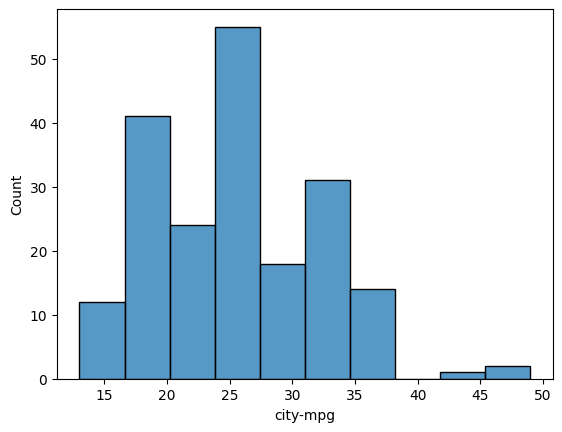

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


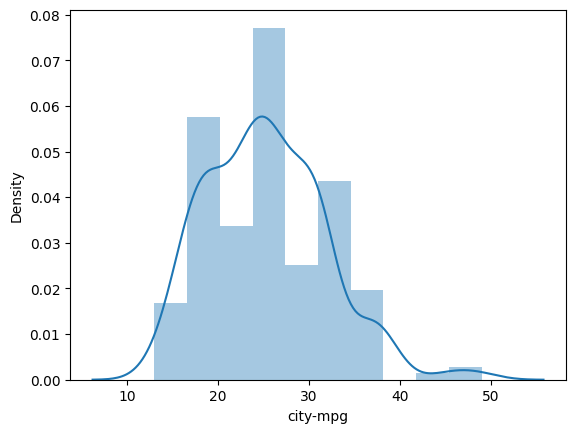

column name: highway-mpg and skewness: 0.5094771690631358


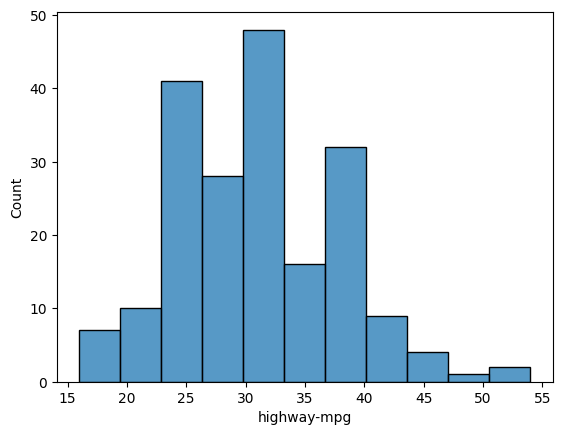

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


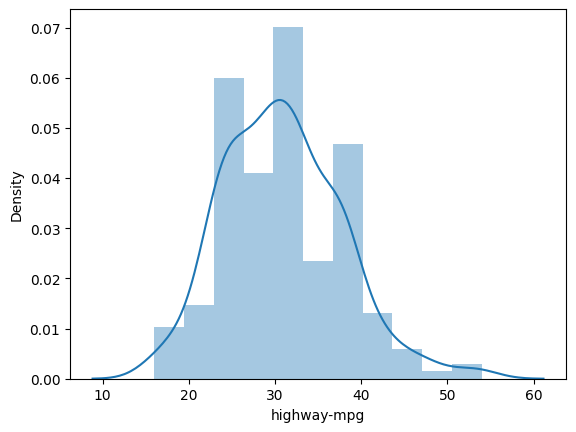

column name: price and skewness: 1.8427198328988192


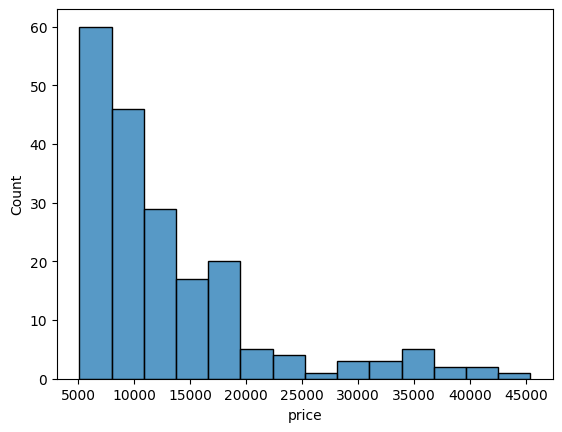

<ipython-input-101-15a972664998>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_num[col])


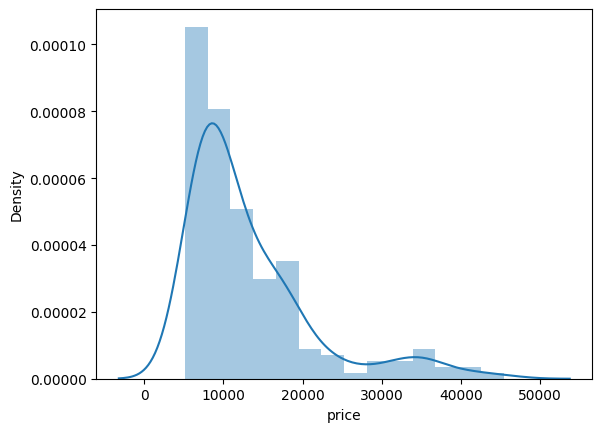

In [ ]:
columns=df_num.columns
print(columns)
for col in columns:
  s=df_num[col].skew()
  print("column name: {} and skewness: {}".format(col,s))
  plt.show()
  sb.histplot(df_num[col])
  plt.show()
  sb.distplot(df_num[col])
  plt.show()

In [ ]:
#TRANSFORMATION WILL BE APPLIED ON THOSE COL WHO HAS SKEWNESS
#APPLY TRANSFORMATION ON SYMBOLIC & NORMALIZED-LOSSES COL BCZ IT HAS BAD CORRELATION WITH THE O/P PRICE.
#BUT ALSO CHECK IF -VE VALUE IS FOUND IN THE SYMBOILIC AND NORMALIZED-LOSSES COL OR NOT.
#IF FOUND -VE VALUE IN SYMBOILIC AND NORMALIZED-LOSSES COL THEN DO NOT APPLY TRANSFORMATION IN THIS COL.


In [ ]:
#RULE 1: IF GOOD CORRELATION FOUND BETWEEN I/P & O/P THEN DO NOT APPLY TRANSFORMATION EVEN IF THE SKEWNESS IS FOUND IN THIS COL.
#RULE 2:  DO NOT APPLY TRANSFORMATION ON -VE VALUE OF GIVEN COL IF FOUND SKEWNESS -VE VALUE OF GIVEN I/P COL WILL MAKE THE VALUE '0'
#SO THEN WE GO TO THE STEP 1 AGAIN.

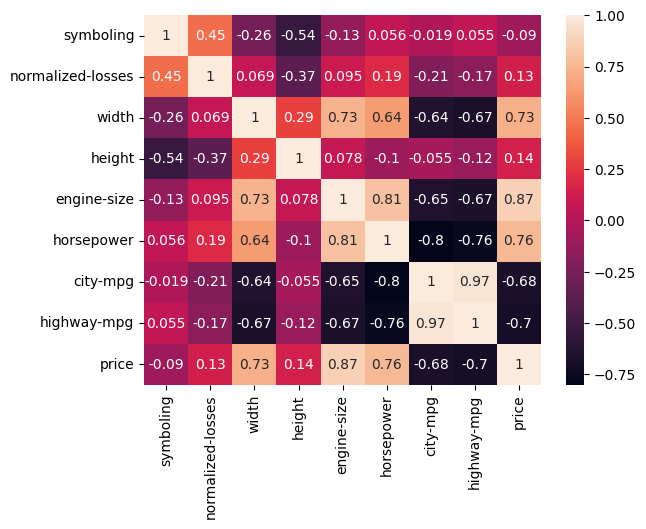

In [ ]:
#CHECK CORRELATION OF I/P WITH O/P
sb.heatmap(df_num.corr(),annot=True)
plt.show()

In [ ]:
#to check symboling col if any -ve value
for i,v in enumerate(df_num['symboling']):
  if v<0:
    print(i,'',v)


28  -1
66  -1
67  -1
69  -1
70  -1
87  -1
122  -1
170  -1
171  -1
172  -1
173  -1
174  -1
187  -2
188  -1
189  -2
190  -1
191  -2
192  -1
193  -1
194  -1
195  -1
196  -1
197  -1


In [ ]:
#OR
#suppose if no -ve value found then do this
ans=0
for i,v in enumerate(df_num['symboling']):
  if v<0:
    ans=1 #-ve value found
    print('negative value found')
    break #exit the loop
    if ans==0:
          print('NO -VE VALUE FOUND')

negative value found


In [ ]:
#SAME FOR NORMALIZED-LOSSES COL IF -VE VALUE IS THERE OR NOT
ans=0
for i,v in enumerate(df_num['normalized-losses']):
  if v<0:
    ans=1 #-ve value found
    print('negative value found')
    break #exit the loop
if ans==0:
  print('NO -VE VALUE FOUND')


NO -VE VALUE FOUND


In [ ]:
#ONLY APPLY TRANSFORMATION ON NORMALIZED-LOSSES COL BCZ SKEWNESS IS FOUND IN THIS COL & NO CORRELATION IS THERE BETWEEN THIS COL WITH O/P
#ALSO NO -VE VALUE IS THERE IN THIS COL


In [ ]:
#2 WAYS TO APPLY TRANSFORMATION
# *LOG()
# *SQRT()
#LOG  AND SQRT OF -VE VALUE IS NULL


In [ ]:

import warnings
warnings.filterwarnings('ignore')
np.log(-1),np.sqrt(-1)

(nan, nan)

In [ ]:
#TO REDUCE SKEWNESS OF NORMALIZED-LOSSES COL
df['normalized-losses']=np.log(df['normalized-losses'])


In [ ]:
#to check the skewness of normalized-losses col
df['normalized-losses'].skew()

0.013037236932823082

In [ ]:
#MERGE BOTH DATAFRAMES DF_CAT & DF_NUM & HOLD IT INTO NEW DATAFRAME
#NUMPY ME COL NAHI HOTA
#PANDAS ME COL HOTA HAI ISLY PANDAS ME CONCATE FUNCT USE KAREGE
#ALSO ROW LENGTH SAME HONA CHAHEYE
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


# STEP 6: SCALING

In [ ]:
#FIRST WE WILL SELECT I/P AND O/P
X=df_new.drop('price',axis=1)
X.columns
Y=df_new['price']
Y


0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 198, dtype: int64

In [ ]:
#now apply scaling on i/p col
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)


In [ ]:
df_new.values #convert df into numpy

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.1000e+01, 2.7000e+01,
        1.3495e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.1000e+01, 2.7000e+01,
        1.6500e+04],
       [0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.9000e+01, 2.6000e+01,
        1.6500e+04],
       ...,
       [2.1000e+01, 1.0000e+00, 3.0000e+00, ..., 1.8000e+01, 2.3000e+01,
        2.1485e+04],
       [2.1000e+01, 0.0000e+00, 3.0000e+00, ..., 2.6000e+01, 2.7000e+01,
        2.2470e+04],
       [2.1000e+01, 1.0000e+00, 3.0000e+00, ..., 1.9000e+01, 2.5000e+01,
        2.2625e+04]])

# STEP 7: FEATURE ENGG (TO ADD NEW COL)

In [ ]:
df_new['Area']=df_new['width']*df_new['height']
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,Area
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495,3128.08
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500,3128.08
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500,3432.20
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950,3594.66
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450,3605.52
